<div style="line-height: 0.4;">
    <h1 style="color: green; font-weight: bold; text-align: center;"></h1>
    <h1 style="color: green; font-weight: bold; text-align: center;">TIEMPOS DE ALCANCE</h1>
    <h3 style="color: darkolivegreen; font-weight: bold; text-align: center;">CURSO 4 (PROCESOS ESTOCÁSTICOS 2)</h3>
    <h5 style="color: darkolivegreen; font-weight: bold; text-align: center;">PARTE 4 / LECCIÓN 2</h5>
</div>

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 1</h4>

<h3>Tiempo de Alcance</h3> 

Simula una trayectoria de movimiento browniano estándar en [0,2] y calcula el *primer tiempo $T_a$* en que la trayectoria alcanza el nivel a = 1.5

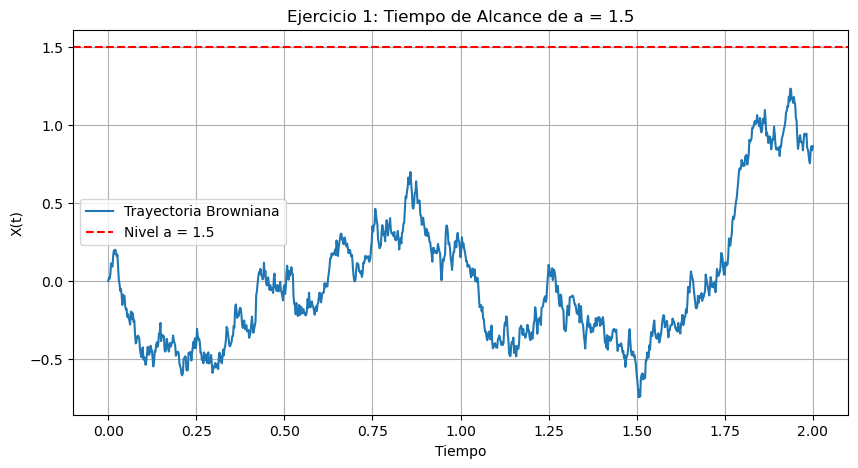

No alcanzó el nivel a.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros comunes
T = 2.0
N = 1000
dt = T / N
t = np.linspace(0, T, N + 1)
np.random.seed(42)

# =============================
# Ejercicio 1: Primer tiempo de alcance Ta para a = 1.5
# =============================

a = 1.5
dW = np.sqrt(dt) * np.random.randn(N)
W = np.concatenate(([0], np.cumsum(dW)))

# Calcular primer tiempo en que W(t) >= a
hitting_time_index = np.where(W >= a)[0]
if hitting_time_index.size > 0:
    Ta = t[hitting_time_index[0]]
else:
    Ta = np.nan  # No alcanzó a

plt.figure(figsize=(10, 5))
plt.plot(t, W, label='Trayectoria Browniana')
plt.axhline(a, color='r', linestyle='--', label=f'Nivel a = {a}')
if not np.isnan(Ta):
    plt.axvline(Ta, color='g', linestyle='--', label=f'Tiempo de alcance Ta = {Ta:.3f}')
plt.title('Ejercicio 1: Tiempo de Alcance de a = 1.5')
plt.xlabel('Tiempo')
plt.ylabel('X(t)')
plt.grid()
plt.legend()
plt.show()

print(f"Primer tiempo de alcance Ta: {Ta:.4f}" if not np.isnan(Ta) else "No alcanzó el nivel a.")

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 2</h4>

<h3>Simulación de Movimiento Browniano estándar</h3> 

Simula 1000 trayectorias de movimiento browniano estándar y estima de manera empírica la probabilidad de que $T_a \leq 1$ para a = 1.

In [2]:
a = 1
M = 1000
hitting_counts = 0

for _ in range(M):
    dW = np.sqrt(dt) * np.random.randn(N)
    W = np.concatenate(([0], np.cumsum(dW)))
    hitting_time_index = np.where(W >= a)[0]
    if hitting_time_index.size > 0 and t[hitting_time_index[0]] <= 1:
        hitting_counts += 1

prob_empirical = hitting_counts / M
print(f"Probabilidad empírica de que Ta ≤ 1 para a = 1: {prob_empirical:.4f}")

Probabilidad empírica de que Ta ≤ 1 para a = 1: 0.3130


<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 3</h4>

Para 1000 trayectorias, calcula la distribución empírica del *valor máximo* alcanzado en el intervalo [0,1]. Compara con la fórmula teórica del máximo.

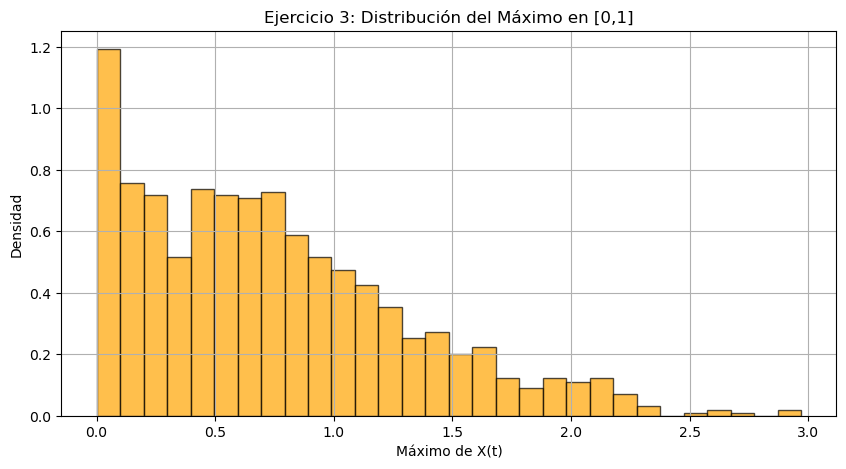

In [3]:
T_max = 1.0
N_max = int(N * T_max / T)
max_values = np.zeros(M)

for i in range(M):
    dW = np.sqrt(dt) * np.random.randn(N_max)
    W = np.concatenate(([0], np.cumsum(dW)))
    max_values[i] = np.max(W)

plt.figure(figsize=(10, 5))
plt.hist(max_values, bins=30, density=True, alpha=0.7, color='orange', edgecolor='black')
plt.title('Ejercicio 3: Distribución del Máximo en [0,1]')
plt.xlabel('Máximo de X(t)')
plt.ylabel('Densidad')
plt.grid()
plt.show()    